1. Import Library and Data

In [1]:
import pandas as pd # cred data and process data
import numpy as np # process data, array, matrix
import matplotlib.pyplot as plt # draw graph, map
from sklearn.preprocessing import MinMaxScaler # Standard Data
from keras.callbacks import ModelCheckpoint # Save the best train
from tensorflow.keras.models import load_model # load model

# Classes to building model
from keras.models import Sequential # input
from keras.layers import LSTM # Dependance Study
from keras.layers import Dropout # study only the topic that you think can be asked about
from keras.layers import Dense # Output

# Check accuracy score
from sklearn.metrics import r2_score # measure comformity
from sklearn.metrics import mean_absolute_error # measure mean absolute error
from sklearn.metrics import mean_absolute_percentage_error # measure % mean absolute error


-2. Read Data

In [2]:
# Read data from csv file
df = pd.read_csv('../Data/VNM_History_Data.csv')

# Delete 
df= df.drop(columns=['KL', '% Thay đổi'])

df.columns = ['Date', 'Close', 'Open', 'Highest', 'Shortest']
# Display dataframe after delete and change name columns
print(df)


            Date      Close       Open    Highest   Shortest
0     21/07/2023  73,500.00  72,500.00  75,000.00  72,400.00
1     20/07/2023  72,700.00  72,600.00  72,900.00  72,300.00
2     19/07/2023  72,600.00  72,500.00  73,000.00  72,400.00
3     18/07/2023  72,400.00  72,500.00  72,600.00  72,200.00
4     17/07/2023  72,300.00  73,000.00  73,600.00  72,200.00
...          ...        ...        ...        ...        ...
2500  16/07/2013  96,528.00  95,139.00  97,222.00  95,139.00
2501  15/07/2013  95,139.00  95,139.00  95,833.00  94,444.00
2502   12/7/2013  95,139.00  94,444.00  95,139.00  93,750.00
2503   11/7/2013  94,444.00  94,444.00  95,139.00  93,750.00
2504   10/7/2013  94,444.00  95,139.00  95,833.00  94,444.00

[2505 rows x 5 columns]


3. Data Overview

In [3]:
# Shape data
df.shape

(2505, 5)

In [4]:
# 5 row begin
df.head(5)

,Date,Close,Open,Highest,Shortest
0,21/07/2023,"73,500.00","72,500.00","75,000.00","72,400.00"
1,20/07/2023,"72,700.00","72,600.00","72,900.00","72,300.00"
2,19/07/2023,"72,600.00","72,500.00","73,000.00","72,400.00"
3,18/07/2023,"72,400.00","72,500.00","72,600.00","72,200.00"
4,17/07/2023,"72,300.00","73,000.00","73,600.00","72,200.00"


In [5]:
# identify tyoe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2505 non-null   object
 1   Close     2505 non-null   object
 2   Open      2505 non-null   object
 3   Highest   2505 non-null   object
 4   Shortest  2505 non-null   object
dtypes: object(5)
memory usage: 98.0+ KB


In [6]:
# Description data
df.describe

<bound method NDFrame.describe of             Date      Close       Open    Highest   Shortest
0     21/07/2023  73,500.00  72,500.00  75,000.00  72,400.00
1     20/07/2023  72,700.00  72,600.00  72,900.00  72,300.00
2     19/07/2023  72,600.00  72,500.00  73,000.00  72,400.00
3     18/07/2023  72,400.00  72,500.00  72,600.00  72,200.00
4     17/07/2023  72,300.00  73,000.00  73,600.00  72,200.00
...          ...        ...        ...        ...        ...
2500  16/07/2013  96,528.00  95,139.00  97,222.00  95,139.00
2501  15/07/2013  95,139.00  95,139.00  95,833.00  94,444.00
2502   12/7/2013  95,139.00  94,444.00  95,139.00  93,750.00
2503   11/7/2013  94,444.00  94,444.00  95,139.00  93,750.00
2504   10/7/2013  94,444.00  95,139.00  95,833.00  94,444.00

[2505 rows x 5 columns]>

4. Data preprocessing

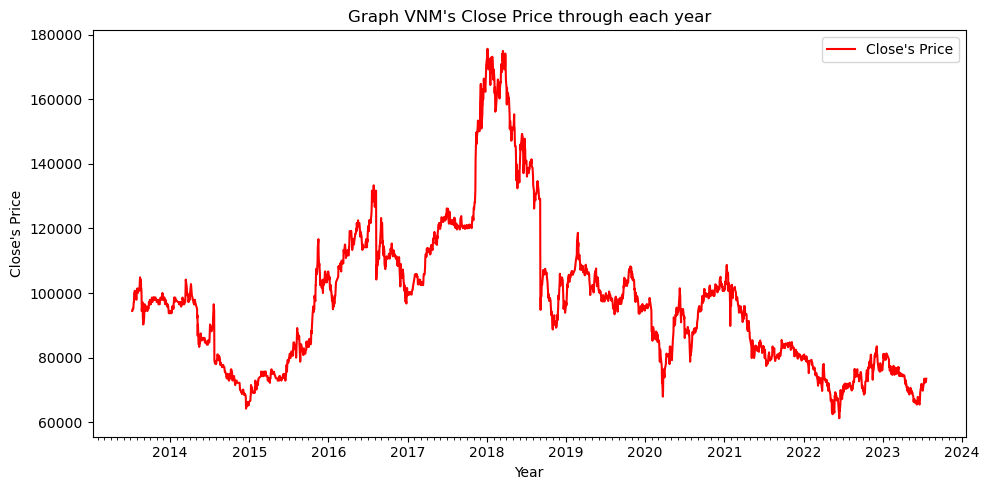

In [7]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Add MonthLocator to fix error

# Change Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Sort date assending time
df = df.sort_values(by='Date')

# Change format price column to float type
df['Close'] = df['Close'].str.replace(',','').astype(float)
df['Open'] = df['Open'].str.replace(',','').astype(float)
df['Highest'] = df['Highest'].str.replace(',','').astype(float)
df['Shortest'] = df['Shortest'].str.replace(',','').astype(float)

# Get infor yaer from Date column
df['Year'] = df['Date'].dt.year

# Create graph colse each years
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label="Close's Price", color='red')
plt.xlabel('Year')
plt.ylabel("Close's Price")
plt.title("Graph VNM's Close Price through each year")
plt.legend(loc='best')

# Format graph display day month follow year month
years =YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator() # Add this sentance to declare MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [8]:
df1 = pd.DataFrame(df,columns=["Date", 'Close'])
df1.index = df1.Date
df1.drop('Date', axis=1, inplace = True)
df1

,Close
Date,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0
...,...
2023-07-17,72300.0
2023-07-18,72400.0
2023-07-19,72600.0


In [9]:
# Split the data set
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

In [10]:
data

array([[94444.],
       [94444.],
       [95139.],
       ...,
       [72600.],
       [72700.],
       [73500.]])

In [11]:
# Data preprocessing
sc = MinMaxScaler(feature_range = (0,1))
sc_train = sc.fit_transform(data)
sc_train

array([[0.29027738],
       [0.29027738],
       [0.29635691],
       ...,
       [0.09919619],
       [0.10007094],
       [0.10706897]])

In [12]:
# Create loop values
x_train, y_train = [], []
for i in range(50, len(train_data)):
    x_train.append(sc_train[i - 50: i, 0]) # take 50 consecutive closing price
    y_train.append(sc_train[i, 0]) # get close's price of ago
    

In [13]:
x_train

[array([0.29027738, 0.29027738, 0.29635691, 0.29635691, 0.30850724,
        0.31457803, 0.31457803, 0.33887869, 0.34494948, 0.34494948,
        0.32672836, 0.33279915, 0.33887869, 0.32065757, 0.32672836,
        0.34494948, 0.34494948, 0.35102902, 0.33887869, 0.35102902,
        0.34494948, 0.34494948, 0.34494948, 0.34494948, 0.35709981,
        0.36925013, 0.38140046, 0.37532967, 0.37532967, 0.35102902,
        0.35102902, 0.33279915, 0.29027738, 0.31457803, 0.30850724,
        0.27205626, 0.26598547, 0.25383514, 0.27205626, 0.29027738,
        0.30850724, 0.30850724, 0.29027738, 0.3024277 , 0.3024277 ,
        0.29635691, 0.3024277 , 0.29635691, 0.29635691, 0.29027738]),
 array([0.29027738, 0.29635691, 0.29635691, 0.30850724, 0.31457803,
        0.31457803, 0.33887869, 0.34494948, 0.34494948, 0.32672836,
        0.33279915, 0.33887869, 0.32065757, 0.32672836, 0.34494948,
        0.34494948, 0.35102902, 0.33887869, 0.35102902, 0.34494948,
        0.34494948, 0.34494948, 0.34494948, 0.

In [14]:
y_train

[0.2963569134842401,
 0.30242770379791795,
 0.2963569134842401,
 0.30242770379791795,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.32065756981190174,
 0.30850724164807086,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.3267283601255797,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756

In [15]:
# Sort data to 2-demensional arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Sort data to 3-demensional arrays
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0],1))


5. Building and Train Model

In [16]:
# Build model
model = Sequential() # Create network class for input data

# Two LSTM Class
model.add(LSTM(units=128, input_shape=(x_train.shape[1],1), return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) # remove soe units to avoid leaving study only the topic that you think can be asked about
model.add(Dense(1)) # output 1 dimensional
# Measure mean absolute error use aptimizer= adam
model.compile(loss='mean_absolute_error', optimizer='adam')

c:\Anaconda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Train Model
save_model = "../Train_Model_Data/save_model.keras"
best_model = ModelCheckpoint(save_model, monitor='loss', verbose = 2, save_best_only=True, mode='auto')
model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.11130, saving model to ../Train_Model_Data/save_model.keras
29/29 - 4s - 138ms/step - loss: 0.1113
Epoch 2/100

Epoch 2: loss improved from 0.11130 to 0.05550, saving model to ../Train_Model_Data/save_model.keras
29/29 - 1s - 52ms/step - loss: 0.0555
Epoch 3/100

Epoch 3: loss improved from 0.05550 to 0.05327, saving model to ../Train_Model_Data/save_model.keras
29/29 - 1s - 51ms/step - loss: 0.0533
Epoch 4/100

Epoch 4: loss improved from 0.05327 to 0.04877, saving model to ../Train_Model_Data/save_model.keras
29/29 - 2s - 55ms/step - loss: 0.0488
Epoch 5/100

Epoch 5: loss improved from 0.04877 to 0.04735, saving model to ../Train_Model_Data/save_model.keras
29/29 - 2s - 52ms/step - loss: 0.0474
Epoch 6/100

Epoch 6: loss improved from 0.04735 to 0.04618, saving model to ../Train_Model_Data/save_model.keras
29/29 - 1s - 51ms/step - loss: 0.0462
Epoch 7/100

Epoch 7: loss improved from 0.04618 to 0.04607, saving model to ../Train_Model

In [18]:
# train data
y_train = sc.inverse_transform(y_train) # real price
final_model = load_model('../Train_Model_Data/save_model.keras')
y_train_predict = final_model.predict(x_train) # predict closing price on the train file
y_train_predict = sc.inverse_transform(y_train_predict) # price's predict

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


6. Model Reuse

In [19]:
# process data test
test = df1[len(train_data) - 50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50, test.shape[0]):
    x_test.append(sc_test[i - 50: i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# data test
y_test = data[1500:] # real price
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) # price's predict


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


7. Accuracy of model

C:\Users\MSI M15\AppData\Local\Temp\ipykernel_4228\543750992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Predict'] = y_train_predict # add more data
C:\Users\MSI M15\AppData\Local\Temp\ipykernel_4228\543750992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Predict'] = y_test_predict # add more data


<function matplotlib.pyplot.show(close=None, block=None)>

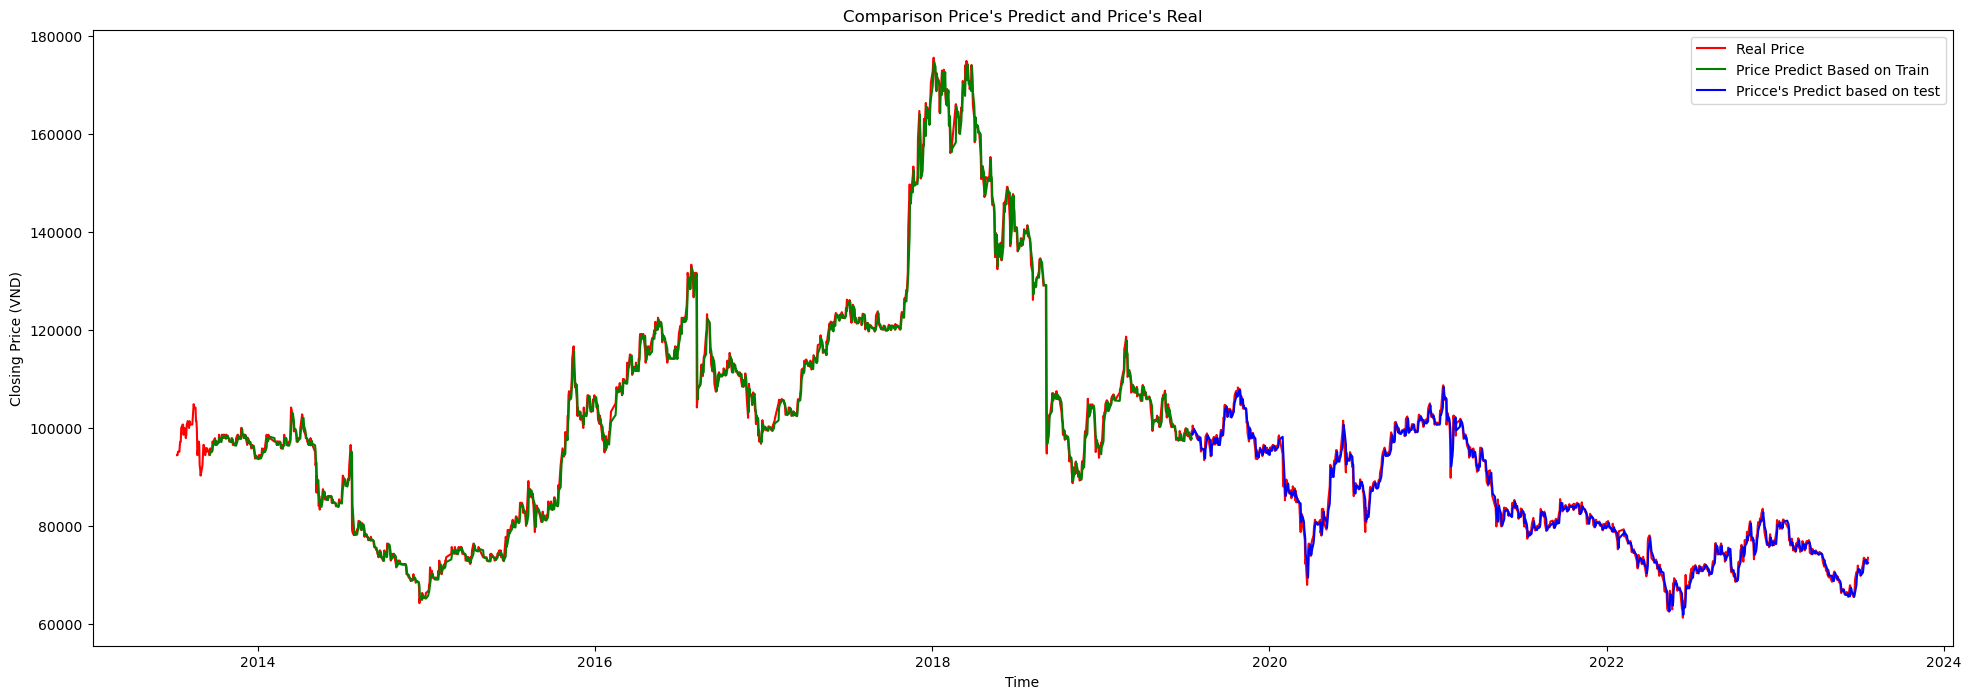

In [20]:
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1, label = 'Real Price', color = 'Red') # real price line
train_data1['Predict'] = y_train_predict # add more data
plt.plot(train_data1['Predict'], label = 'Price Predict Based on Train', color='Green') # predict price test
test_data1['Predict'] = y_test_predict # add more data
plt.plot(test_data1['Predict'], label="Pricce's Predict based on test", color='blue') # price's predict test line
plt.title("Comparison Price's Predict and Price's Real")
plt.xlabel("Time")
plt.ylabel('Closing Price (VND)')
plt.legend()
plt.show

In [21]:
#r2
print('Accuracy on the train', r2_score(y_train, y_train_predict))

#mae
print('Meain Absolute Error on train ', mean_absolute_error(y_train, y_train_predict))

# mea %%!

print('Mean Absolute Percentage Error', mean_absolute_percentage_error(y_train, y_train_predict))

Accuracy on the train 0.9929566757433184
Meain Absolute Error on train  1172.900544181034
Mean Absolute Percentage Error 0.010854675392719951


In [22]:
train_data1

,Close,Predict
Date,,
2013-09-19,95139.0,94511.929688
2013-09-20,95833.0,94795.140625
2013-09-23,95139.0,95429.796875
2013-09-24,95833.0,95174.132812
2013-09-25,97222.0,95489.578125
...,...,...
2019-07-11,99133.0,98805.664062
2019-07-12,98183.0,98936.734375
2019-07-15,97549.0,98314.296875


In [23]:
#r2
print('Accuracy on the train', r2_score(y_test, y_test_predict))

#mae
print('Meain Absolute Error on train ', mean_absolute_error(y_test, y_test_predict))

# mea %%!

print('Mean Absolute Percentage Error', mean_absolute_percentage_error(y_test, y_test_predict))

Accuracy on the train 0.9850550952973397
Meain Absolute Error on train  980.9668936567164
Mean Absolute Percentage Error 0.011808684451203082


In [24]:
test_data1

,Close,Predict
Date,,
2019-07-18,98658.0,98796.898438
2019-07-19,100479.0,98670.875000
2019-07-22,99371.0,99814.515625
2019-07-23,99291.0,99493.296875
2019-07-24,99450.0,99214.218750
...,...,...
2023-07-17,72300.0,73082.054688
2023-07-18,72400.0,72523.968750
2023-07-19,72600.0,72277.906250


8 Test predict Feature Price and comparison with price last day

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

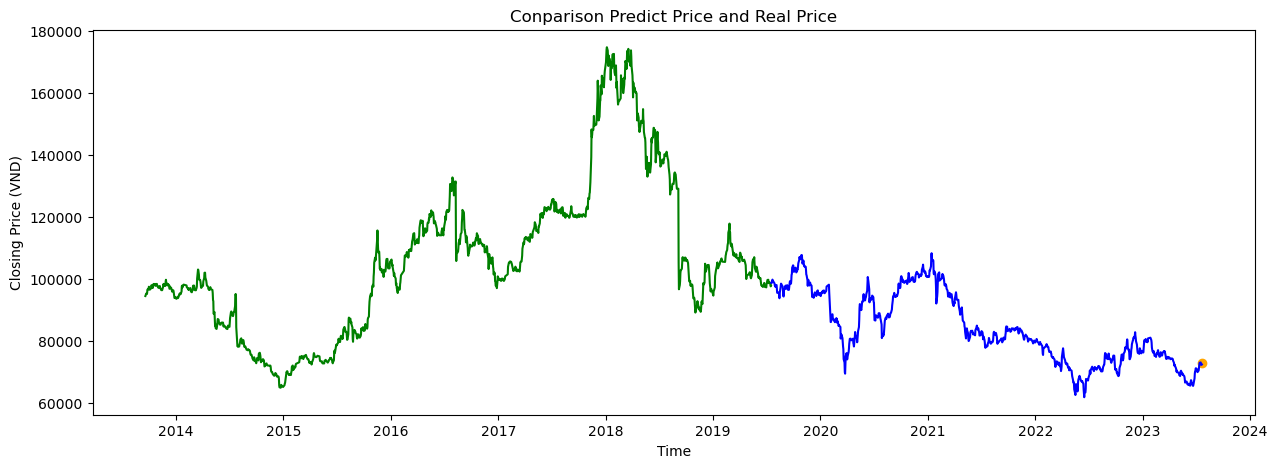

In [27]:
# Take consecutive day after last day in data to predict
next_date = df['Date'].iloc[-1] + pd.Timedelta(days=1)

# Change consucutive day to datetime format
next_date = pd.to_datetime(next_date)

# Take last day price in the data
next_closing_price = np.array([df['Close'].iloc[-1]]) # Take closing price of last day

# Standard Value of Last Day
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1)) # Change to 2 dimensional array

# Build Predict for next day based tranned model
x_next = np.array([sc_train[-50:,0]]) # Take 50 closing price nearest
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1],1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Add more data predict of next day in the DataFrame
df_next = pd.DataFrame({'Date': [next_date], 'Close': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Draw new graph to predict price of next day in the feature
plt.figure(figsize=(15,5))
plt.plot(df1['Date'], df1['Close'], label='Real Price', color='red')
plt.plot(train_data1.index, train_data1['Predict'], label='Price Predict Train', color='green')
plt.plot(test_data1.index, test_data1['Predict'], label='Price Predict Test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Predict Next Day')
plt.xlabel('Time')
plt.ylabel('Closing Price (VND)')
plt.title("Conparison Predict Price and Real Price")
plt.show


In [26]:
# Take value of last day in data
actual_closing_price = df['Close'].iloc[-1]

# Create DataFrame conparison predict price with last day price in data
comparison_df = pd.DataFrame({'Date': [next_date], 'Predict Price': [y_next_predict[0][0]], 'Price Before A day': [actual_closing_price]}); 
print(comparison_df)

        Date  Predict Price  Price Before A day
0 2023-07-22   72988.296875             73500.0
